In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
N = 10

np.random.seed(42)
coord = np.random.randint(0 , 20, (N,2))
len(coord)

10

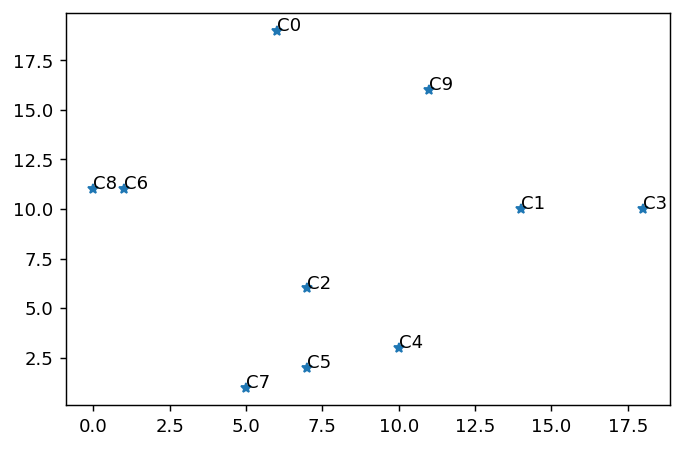

In [8]:
plt.figure(dpi=130)
plt.plot(coord[:,0],coord[:,1], "*")

for i in range(N):
    plt.annotate("C" + str(i), (coord[i,0], coord[i,1]))
plt.show()

In [9]:
range(N)

range(0, 10)

In [10]:
x_old = np.random.permutation(range(10))
x_old

array([1, 5, 4, 8, 0, 7, 6, 3, 2, 9])

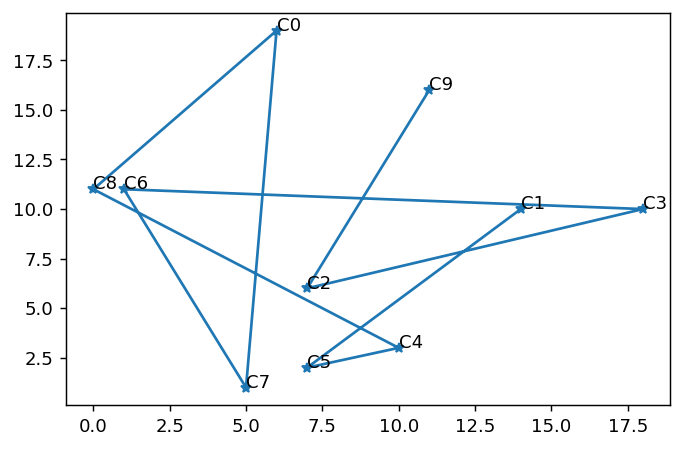

In [11]:
plt.figure(dpi=130)
plt.plot(coord[x_old,0],coord[x_old,1], "-*")

for i in range(N):
    plt.annotate("C" + str(i), (coord[i,0], coord[i,1]))
plt.show()

In [14]:
def plot_route(coord, solution):
    new_sol = np.append(solution, solution[0])
    
    plt.figure(dpi=130)
    plt.plot(coord[new_sol,0],coord[new_sol,1], "-*")

    for i in range(N):
        plt.annotate("C" + str(i), (coord[i,0], coord[i,1]))
    plt.show()

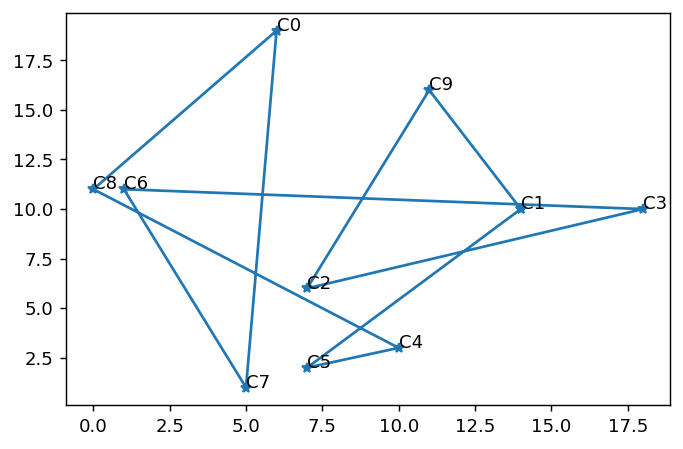

In [15]:
plot_route(coord, x_old)

In [17]:
a1 = coord[x_old, :]
a1

array([[14, 10],
       [ 7,  2],
       [10,  3],
       [ 0, 11],
       [ 6, 19],
       [ 5,  1],
       [ 1, 11],
       [18, 10],
       [ 7,  6],
       [11, 16]])

In [18]:
altered_x_old = np.append(x_old[1:], x_old[0])
a2 = coord[altered_x_old, :]
a2

array([[ 7,  2],
       [10,  3],
       [ 0, 11],
       [ 6, 19],
       [ 5,  1],
       [ 1, 11],
       [18, 10],
       [ 7,  6],
       [11, 16],
       [14, 10]])

In [19]:
def calculate_objective(coord, solution):
    a1 = coord[solution,:]
    altered_sol = np.append(solution[1:], solution[0])
    a2 = coord[altered_sol,:]
    
    return np.sum(np.sqrt(np.sum((a1-a2)**2, axis=1)))

In [20]:
def generate_sol(current_sol, num_cities):
    current_sol_copy = current_sol.copy()
    idx1, idx2 = np.random.choice(num_cities, 2)
    current_sol_copy[idx2], current_sol_copy[idx1] = current_sol_copy[idx1], current_sol_copy[idx2]
    return current_sol_copy


In [21]:
generate_sol(x_old,N)

array([1, 5, 4, 8, 6, 7, 0, 3, 2, 9])

In [22]:
x_old

array([1, 5, 4, 8, 0, 7, 6, 3, 2, 9])

In [ ]:
np.random.seed(42)
x_old = np.random.permutation(range(N))
f_old = calculate_objective(coord, x_old)

for i in range(1000):
    x_new = generate_sol(x_old, N)
    f_new = calculate_objective(coord, x_new)
    if f_new < f_old:
        x_old= x_new
        